# 1. Data
Location of the csv dataset ' Amazing Cart EU' https://www.artofvisualization.com/pages/tableau

Location of the API countries https://api.covid19api.com/summary

# 2. Importing 

Importing packages

In [1]:
import pandas as pd
import os 
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np

### Custom Function

In [2]:
def Dataframe(a):  # creating a custom function to export dataframe to csv
    answer = a.to_csv('Project_Output.csv')     # this function is used instead of typing the .to_csv code everytime i want to extract dataframes to excel
    return answer

### Importing data from csv

In [3]:
# Finding current path
os.getcwd()

# Assigning csv files to dataframes
order_list = pd.read_csv('list_of_orders.csv' , parse_dates=['Order Date','Ship Date']) #reading list of orders file
order_breakdown = pd.read_csv('order_breakdown.csv') #reading list of orders file
order_breakdown

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,45.0,-26.0,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,854.0,290.0,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140.0,21.0,3,Office Supplies,Art
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,27.0,-22.0,2,Office Supplies,Art
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,17.0,-1.0,2,Office Supplies,Storage
...,...,...,...,...,...,...,...,...
8042,AZ-2014-766953,"Ikea Stackable Bookrack, Traditional",0.0,245.0,91.0,2,Furniture,Bookcases
8043,BN-2014-4140795,"BIC Pencil Sharpener, Fluorescent",0.5,30.0,-10.0,2,Office Supplies,Art
8044,BN-2014-4140795,"Avery Binder Covers, Recycled",0.5,23.0,-6.0,4,Office Supplies,Binders
8045,BN-2014-4140795,"StarTech Phone, Red",0.5,108.0,-19.0,3,Technology,Machines


### Merging Dataframe

In [4]:
# Merging dataframes from csv
combined = pd.merge(order_list, order_breakdown, how='inner', on = 'Order ID')
combined.head()

,Order ID,Order Date,Customer Name,City,CountryCode,Region,Segment,Ship Date,Order Shipment TimeFrame,Ship Mode,State,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,AZ-2011-4827146,2011-11-01,Faith Greenwood,Vienna,AT,Central,Consumer,2011-01-15,4,Economy,Vienna,"Boston Canvas, Fluorescent",0.0,55.0,10.0,1,Office Supplies,Art
1,AZ-2011-4827146,2011-11-01,Faith Greenwood,Vienna,AT,Central,Consumer,2011-01-15,4,Economy,Vienna,"Smead Trays, Single Width",0.0,97.0,31.0,2,Office Supplies,Storage
2,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,AT,Central,Home Office,2011-01-19,5,Economy,Vienna,"Xerox Message Books, Premium",0.0,224.0,103.0,11,Office Supplies,Paper
3,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,AT,Central,Home Office,2011-01-19,5,Economy,Vienna,"StarTech Card Printer, White",0.0,486.0,78.0,3,Technology,Machines
4,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,AT,Central,Home Office,2011-01-19,5,Economy,Vienna,"Apple Headset, with Caller ID",0.0,440.0,66.0,6,Technology,Phones


### Importing data from API

In [5]:
#Retrieving country codes & name from API
cv19 = requests.get('https://api.covid19api.com/summary')
cv19 = cv19.json()
df = pd.DataFrame(cv19['Countries'])
countries = df[["Country","CountryCode"]]
countries.head()

,Country,CountryCode
0,Afghanistan,AF
1,Albania,AL
2,Algeria,DZ
3,Andorra,AD
4,Angola,AO


# 3. Preparation

#### Merging dataframes from csv & API

In [6]:
df_joined_table = pd.merge(combined,countries, on='CountryCode', how='left')
df_merged=df_joined_table[['Order ID','Order Date','Customer Name','City','Country','Region','Segment','Ship Date',
                  'Ship Mode','State','Product Name','Discount','Sales','Profit','Quantity','Category','Sub-Category', 'Order Shipment TimeFrame']]

#code to check the number of nulls in the dataset 
df_merged.isnull().sum() 

#UK did not have corresponding Country name , using code to replace the null values with 'United Kingdom'
df_merged = df_merged.replace(r'^\s*$', np.nan, regex=True)
df_merged.fillna('United Kingdom', inplace=True)
df_merged

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,Order Shipment TimeFrame
0,AZ-2011-4827146,2011-11-01,Faith Greenwood,Vienna,Austria,Central,Consumer,2011-01-15,Economy,Vienna,"Boston Canvas, Fluorescent",0.0,55.0,10.0,1,Office Supplies,Art,4
1,AZ-2011-4827146,2011-11-01,Faith Greenwood,Vienna,Austria,Central,Consumer,2011-01-15,Economy,Vienna,"Smead Trays, Single Width",0.0,97.0,31.0,2,Office Supplies,Storage,4
2,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Austria,Central,Home Office,2011-01-19,Economy,Vienna,"Xerox Message Books, Premium",0.0,224.0,103.0,11,Office Supplies,Paper,5
3,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Austria,Central,Home Office,2011-01-19,Economy,Vienna,"StarTech Card Printer, White",0.0,486.0,78.0,3,Technology,Machines,5
4,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Austria,Central,Home Office,2011-01-19,Economy,Vienna,"Apple Headset, with Caller ID",0.0,440.0,66.0,6,Technology,Phones,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,AZ-2014-8007090,2014-12-30,Mary Saterfiel,Plymouth,United Kingdom,North,Consumer,2015-03-01,Economy,England,"Fellowes Box, Single Width",0.0,39.0,2.0,2,Office Supplies,Storage,4
8043,AZ-2014-157670,2014-12-30,Max Ludwig,Edinburgh,United Kingdom,North,Home Office,2015-04-01,Economy,Scotland,"Office Star Chairmat, Adjustable",0.0,68.0,27.0,1,Furniture,Chairs,5
8044,AZ-2014-766953,2014-12-31,Jose Gambino,Maidenhead,United Kingdom,North,Corporate,2015-05-01,Economy,England,"Ikea Stackable Bookrack, Traditional",0.0,245.0,91.0,2,Furniture,Bookcases,5
8045,AZ-2014-766953,2014-12-31,Jose Gambino,Maidenhead,United Kingdom,North,Corporate,2015-05-01,Economy,England,"Motorola Audio Dock, VoIP",0.0,867.0,251.0,5,Technology,Phones,5


### checking for duplicates

In [7]:

Dataframe(df_merged) #extracting the merged dataframes to csv 
#After looking at the dataset there was no duplicates , no need to perform remove dpulicates 

#### Ordering dataframe

In [8]:
df_merged.sort_values(by=['Order Date'], ascending=False)
df_merged.head()


,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,Order Shipment TimeFrame
0,AZ-2011-4827146,2011-11-01,Faith Greenwood,Vienna,Austria,Central,Consumer,2011-01-15,Economy,Vienna,"Boston Canvas, Fluorescent",0.0,55.0,10.0,1,Office Supplies,Art,4
1,AZ-2011-4827146,2011-11-01,Faith Greenwood,Vienna,Austria,Central,Consumer,2011-01-15,Economy,Vienna,"Smead Trays, Single Width",0.0,97.0,31.0,2,Office Supplies,Storage,4
2,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Austria,Central,Home Office,2011-01-19,Economy,Vienna,"Xerox Message Books, Premium",0.0,224.0,103.0,11,Office Supplies,Paper,5
3,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Austria,Central,Home Office,2011-01-19,Economy,Vienna,"StarTech Card Printer, White",0.0,486.0,78.0,3,Technology,Machines,5
4,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Austria,Central,Home Office,2011-01-19,Economy,Vienna,"Apple Headset, with Caller ID",0.0,440.0,66.0,6,Technology,Phones,5


# 4. Analysis

#### Creating conditional statement
- *Creating new column to get difference between order date and shipping date*

In [34]:
def assign_Result(x):
    if (x == 2) or (x == 3) :
        return  'Priority Shipping'
    elif (x == 0) or (x == 1):
        return 'Next Day Shipping'
    elif x >= 4:
        return 'Standard Shipping'
    else:
        return 'Other'
df_merged['Shipping options'] = df_merged['Order Shipment TimeFrame'].apply(assign_Result)
#df_merged = df_merged.drop('Ship Mode', axis=1) # removing the 'Ship Mode' column
df_merged['Year'] = df_merged['Order Date'].dt.strftime('%Y')
df_merged['Month'] = df_merged['Order Date'].dt.strftime('%b')
df_merged['Month-Year'] = df_merged['Order Date'].dt.strftime('%m/%Y')
df_merged['day'] = df_merged['Order Date'].dt.day_of_week
Dataframe(df_merged) #exporting the data without the 'ship mode' column
df_merged

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,...,Profit,Quantity,Category,Sub-Category,Order Shipment TimeFrame,Shipping options,Year,Month,Month-Year,day
0,AZ-2011-4827146,2011-11-01,Faith Greenwood,Vienna,Austria,Central,Consumer,2011-01-15,Economy,Vienna,...,10.0,1,Office Supplies,Art,4,Standard Shipping,2011,Nov,11/2011,1
1,AZ-2011-4827146,2011-11-01,Faith Greenwood,Vienna,Austria,Central,Consumer,2011-01-15,Economy,Vienna,...,31.0,2,Office Supplies,Storage,4,Standard Shipping,2011,Nov,11/2011,1
2,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Austria,Central,Home Office,2011-01-19,Economy,Vienna,...,103.0,11,Office Supplies,Paper,5,Standard Shipping,2011,Jan,01/2011,4
3,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Austria,Central,Home Office,2011-01-19,Economy,Vienna,...,78.0,3,Technology,Machines,5,Standard Shipping,2011,Jan,01/2011,4
4,AZ-2011-5960662,2011-01-14,Ella Troy,Vienna,Austria,Central,Home Office,2011-01-19,Economy,Vienna,...,66.0,6,Technology,Phones,5,Standard Shipping,2011,Jan,01/2011,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,AZ-2014-8007090,2014-12-30,Mary Saterfiel,Plymouth,United Kingdom,North,Consumer,2015-03-01,Economy,England,...,2.0,2,Office Supplies,Storage,4,Standard Shipping,2014,Dec,12/2014,1
8043,AZ-2014-157670,2014-12-30,Max Ludwig,Edinburgh,United Kingdom,North,Home Office,2015-04-01,Economy,Scotland,...,27.0,1,Furniture,Chairs,5,Standard Shipping,2014,Dec,12/2014,1
8044,AZ-2014-766953,2014-12-31,Jose Gambino,Maidenhead,United Kingdom,North,Corporate,2015-05-01,Economy,England,...,91.0,2,Furniture,Bookcases,5,Standard Shipping,2014,Dec,12/2014,2
8045,AZ-2014-766953,2014-12-31,Jose Gambino,Maidenhead,United Kingdom,North,Corporate,2015-05-01,Economy,England,...,251.0,5,Technology,Phones,5,Standard Shipping,2014,Dec,12/2014,2


#### Group by Country to aggregate sales 

In [10]:
#The following code gets the top performing countries based on no. of orders
df_sales = df_merged.query('Year =="2014"')
df_sales_by_country = df_sales.groupby(['Country','Year']).agg({'Sales':'sum'}).sort_values(by=['Sales'], ascending=False)
df_sales_by_country
#Dataframe(df_sales_by_country)

,,Sales
Country,Year,
France,2014,198260.0
Germany,2014,150812.0
United Kingdom,2014,131943.0
Italy,2014,90263.0
Spain,2014,77158.0
Austria,2014,22777.0
Netherlands,2014,19492.0
Belgium,2014,16242.0
Sweden,2014,15588.0


### Creating For Loop 

In [11]:
# For loop to identify what customers have a profit of more than 1000 euros 
high_value_cust = []
for index,row in df_merged.iterrows():
    if row['Profit'] > 1000:
        high_value_cust.append([row['Customer Name'],row['Profit'],row['Country']])
    else:
        continue
for i in high_value_cust:
    print(i)


['Lola Hughes', 1127.0, 'Austria']
["Maya O'Sullivan", 1868.0, 'France']
['Ashton Charles', 1518.0, 'France']
['Robert Neil', 1164.0, 'France']
['Jordan Peacock', 1189.0, 'France']
['Erick Tanner', 1019.0, 'France']
['Thomas McCallum', 1364.0, 'Germany']
['Morgan Dodd', 1112.0, 'Germany']
['Robert Ramsey', 1094.0, 'Germany']
['Milla Day', 1130.0, 'Germany']
['Nicole Carr', 1042.0, 'Germany']
['Hayley Baldwinson', 1151.0, 'Germany']
['Michael Flores', 1141.0, 'Italy']
['Angie Massengill', 1990.0, 'Italy']
['Alexander Bond', 2476.0, 'Spain']
['Catharine Robbins', 1445.0, 'Spain']
['Bianca Whitford', 1296.0, 'Spain']
['Eloise Sykes', 1015.0, 'Spain']
['Maynard Moorman', 1470.0, 'Spain']
['Joel Ortega', 1220.0, 'Spain']
['Phoebe Moore', 1041.0, 'Spain']
['Nancy Seay', 1050.0, 'Spain']
['Abby Mei', 1061.0, 'Switzerland']
['Natasha Sykes', 1759.0, 'United Kingdom']
['Molly Palmer', 1425.0, 'United Kingdom']
['Rachel Norton', 1528.0, 'United Kingdom']
['Harrison Cooke', 2461.0, 'United Kingdo

Converting List into Dataframe

In [12]:
#This dataframe can be by CRM team to target high value customers with offers, promos etc 
df_high_value_customers = pd.DataFrame (high_value_cust, columns = ['Customer Name','Profit','Country'])
df_high_value_customers.head()
Dataframe(df_high_value_customers) #writing the dataframe to a csv which can be next to the CRM team

# 5. Visualisation

### Top 10 Countries with highest sales 

In [13]:
df_top_sales_by_country = df_merged.groupby(['Country'], as_index=True).agg({'Sales':'sum'}).sort_values(by=['Sales'], ascending=False).head(10)
df_top_sales_by_country

,Sales
Country,
France,609683.0
Germany,488681.0
United Kingdom,420497.0
Italy,252742.0
Spain,249402.0
Austria,79382.0
Netherlands,70313.0
Belgium,42320.0
Sweden,30490.0


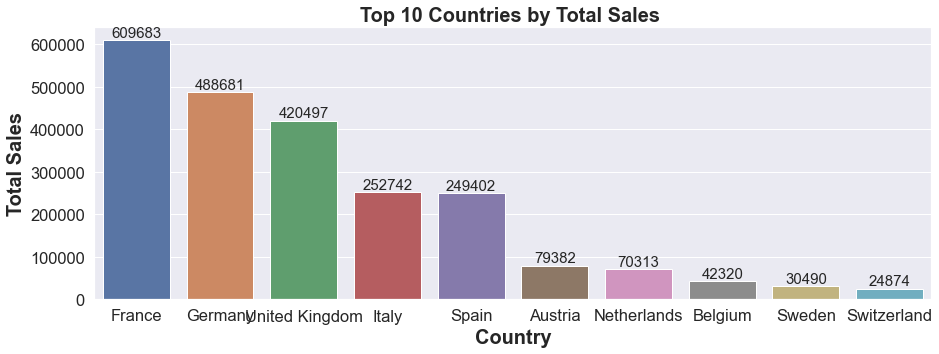

In [15]:
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
p = sns.barplot(
    x="Country", 
    y="Sales", 
    data=df_top_sales_by_country.reset_index(), 
    estimator=sum, 
    ci=None
    );
plt.rcParams['figure.figsize'] = [15, 5]
p.bar_label(p.containers[0], fontsize=15)
#p.legend(fontsize=25)
p.set_xlabel("Country", fontsize = 20, weight='bold')
p.set_ylabel("Total Sales", fontsize = 20,  weight='bold')
p.set_title("Top 10 Countries by Total Sales ", fontsize = 20, weight='bold')
#plt.rcParams['figure.figsize'] = [40, 15]
#plt.figure(figsize=(15,8))
#plt.xticks(rotation = 45)
plt.show()
fig = p.get_figure()
fig.savefig("Top 10 Countries by Sales.png") 

### Top 10 Countries by no. of orders

In [16]:
#df_sales = df_merged[df_merged["Category"].str.contains("Office Supplies")]
#df_sales = df_merged.query('Year =="2014"')
df_top_orders_by_country = df_merged.groupby(['Country'], as_index=True).agg({'Quantity':'sum'}).sort_values(by=['Quantity'], ascending=False).head(10)
#df_top_sales_by_country["Rank"] = df_top_sales_by_country["Sales"].rank()
#df_top_sales_by_country.sort_values("Rank", inplace = True)
df_top_orders_by_country

,Quantity
Country,
France,7329
Germany,6179
United Kingdom,4917
Italy,3612
Spain,2881
Netherlands,1526
Austria,973
Sweden,753
Belgium,532


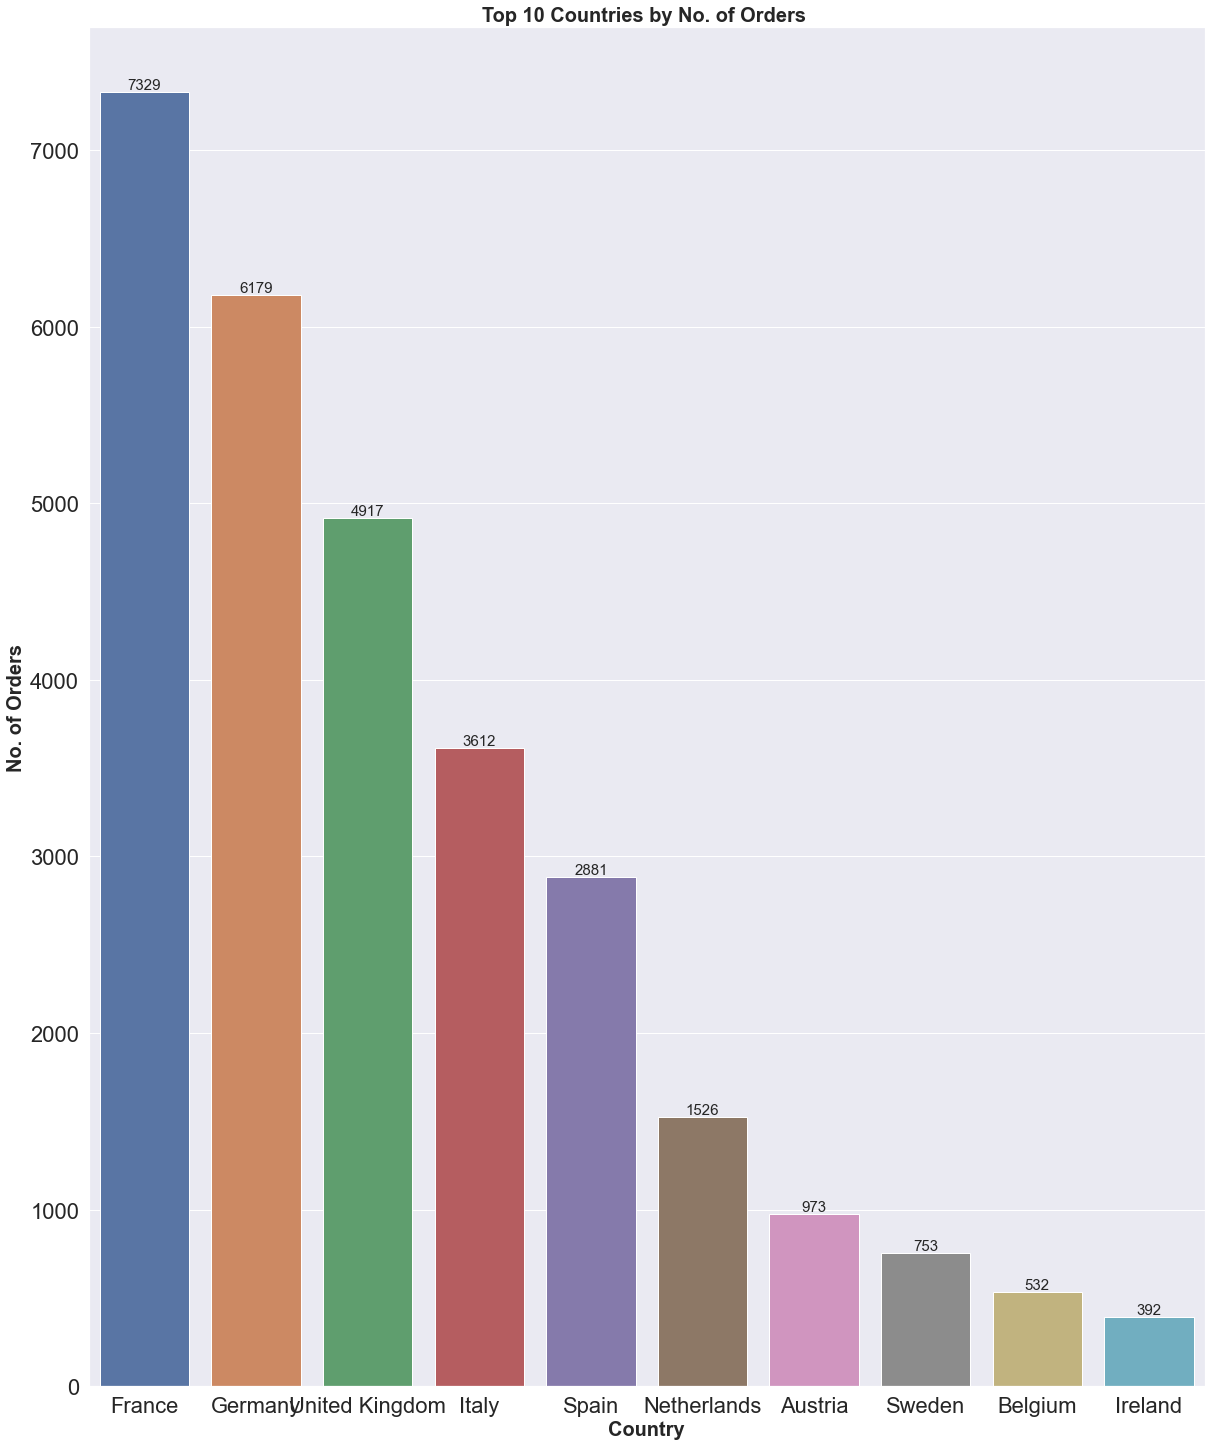

In [19]:
sns.set(font_scale=2)
import matplotlib.pyplot as plt
p = sns.barplot(
    x="Country", 
    y="Quantity", 
    data=df_top_orders_by_country.reset_index(), 
    estimator=sum, 
    ci=None
    );
plt.rcParams['figure.figsize'] = [20, 10]
p.bar_label(p.containers[0], fontsize=15)
#p.legend(fontsize=25)
p.set_xlabel("Country", fontsize = 20, weight='bold')
p.set_ylabel("No. of Orders", fontsize = 20,  weight='bold')
p.set_title("Top 10 Countries by No. of Orders ", fontsize = 20, weight='bold')
#plt.rcParams['figure.figsize'] = [40, 15]
#plt.figure(figsize=(15,8))
#plt.xticks(rotation = 45)
plt.show()
fig = p.get_figure()
fig.savefig("Top 10 Countries No. of Orders .png") 

### No. of products ordered by customers 

C:\Users\odrisclo\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


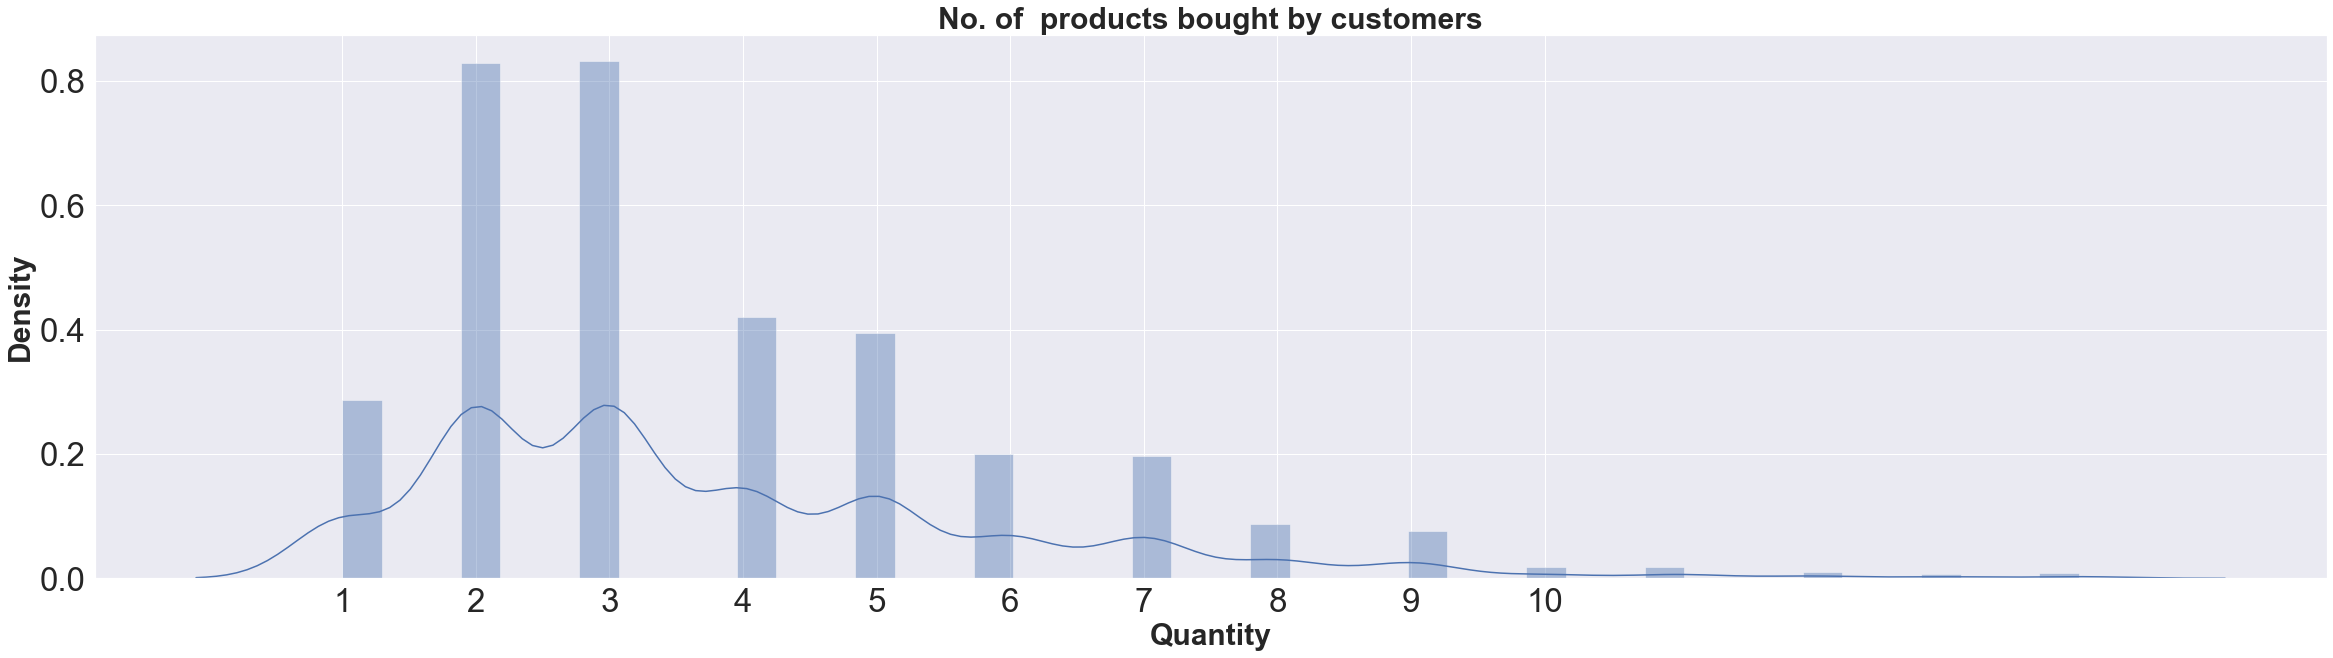

In [32]:
sns.set(font_scale=3)
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (40,10))
p = sns.distplot(df_merged['Quantity'])
plt.xticks(xdata)
p.set_xlabel("Quantity", fontsize = 30, weight='bold')
p.set_ylabel("Density", fontsize = 30,  weight='bold')
p.set_title("No. of  products bought by customers", fontsize = 30, weight='bold')
plt.rcParams['figure.figsize'] = [40, 15]
plt.show()
fig = p.get_figure()
fig.savefig("No. of products ordered by customers.png") 

C:\Users\odrisclo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


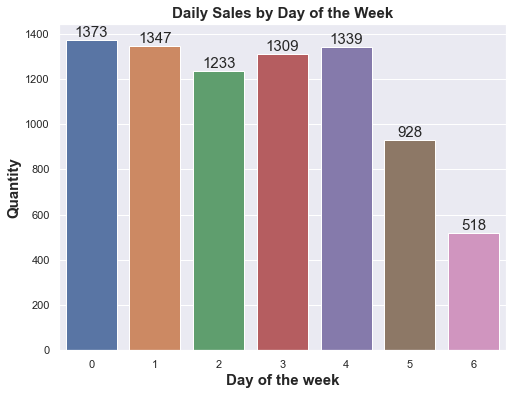

In [38]:
sns.set(font_scale=1)
plt.figure(figsize=(8, 6))
plt.title('Daily Sales by Day of the Week')
p = sns.countplot(df_merged['day'])
p.bar_label(p.containers[0], fontsize=15)
p.set_xlabel("Day of the week", fontsize = 15, weight='bold')
p.set_ylabel("Quantity", fontsize = 15,  weight='bold')
p.set_title("Daily Sales by Day of the Week", fontsize = 15, weight='bold')
plt.rcParams['figure.figsize'] = [60, 25]
plt.show()
fig = p.get_figure()
fig.savefig("Daily Sales by Day of the Week.png") 

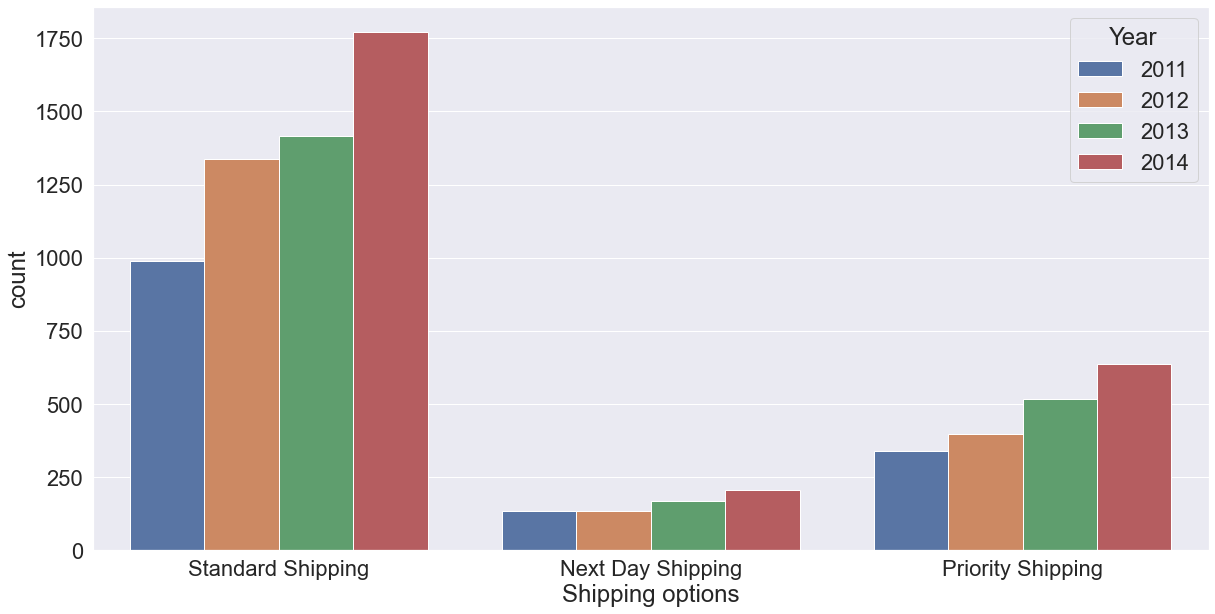

In [22]:
import matplotlib.pyplot as plt
sns.countplot(data=df_merged, x="Shipping options", hue="Year") 
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()


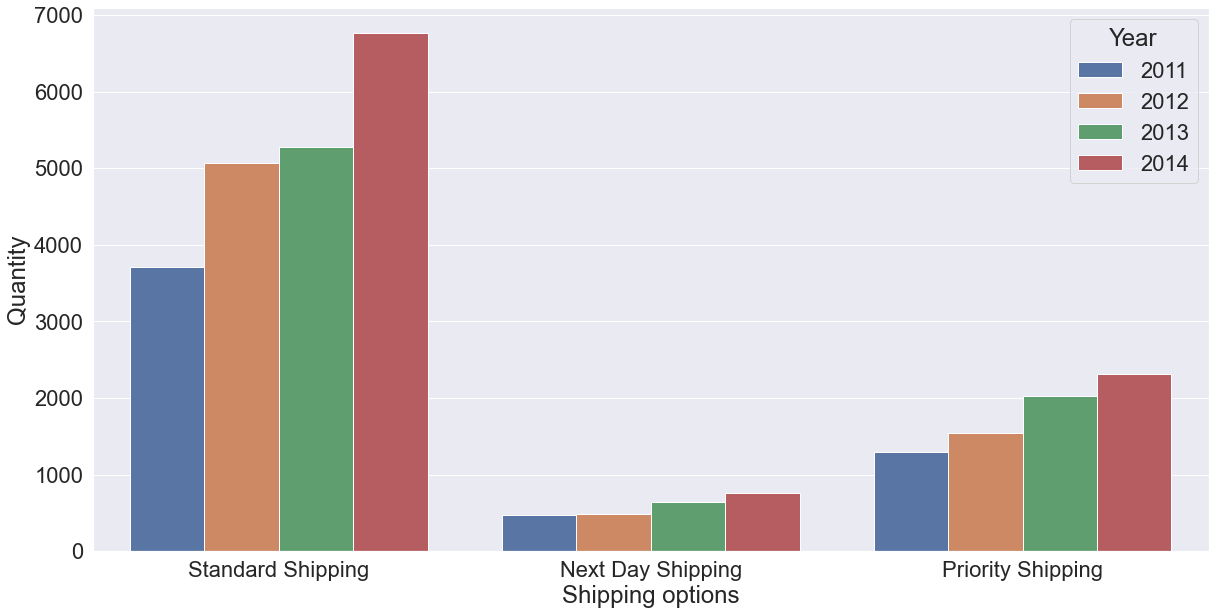

In [23]:
import matplotlib.pyplot as plt
p = sns.barplot(
    x="Shipping options", 
    y="Quantity", 
    data=df_merged, 
    estimator=sum, 
    ci=None, 
    hue="Year",
    );
plt.rcParams['figure.figsize'] = [20, 25]
plt.show()

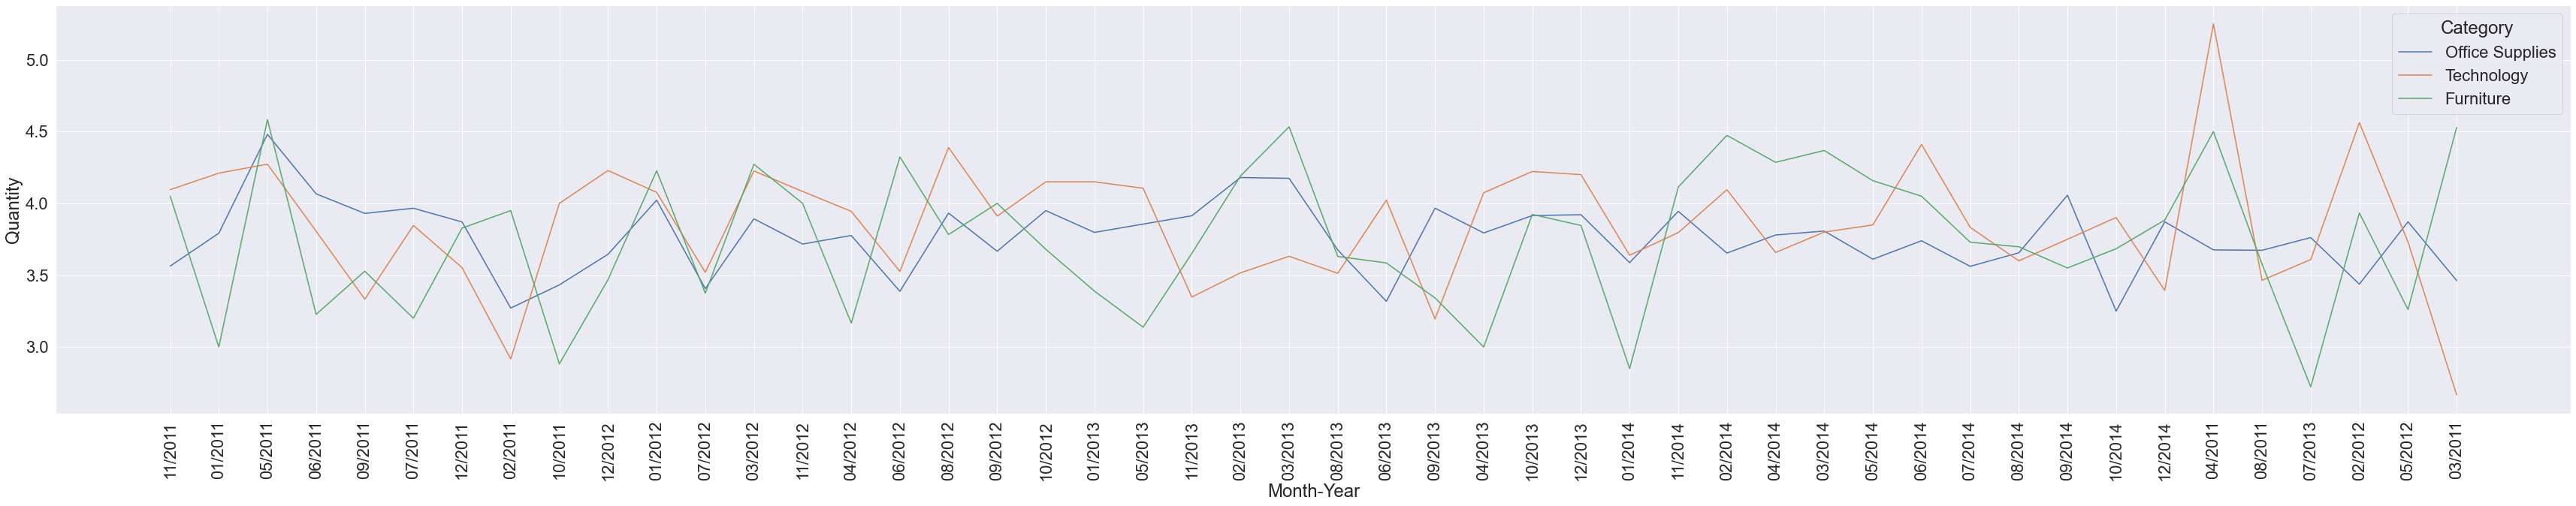

In [27]:
sns.lineplot(x="Month-Year", y="Quantity", hue="Category", data=df_merged, ci=None)
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = [60, 10]
plt.show()

### Shipping options by country

In [29]:

# Define a query string with isin
subset = df_merged['Country'].isin(["Ireland"])
# filter specific columns
cols = ['Country', 'Quantity', 'Year', 'Shipping options']
country_df = df_merged.loc[subset, cols]
country_df.head()
#Dataframe(country_df)


,Country,Quantity,Year,Shipping options
4079,Ireland,3,2011,Standard Shipping
4080,Ireland,7,2011,Standard Shipping
4081,Ireland,3,2011,Standard Shipping
4082,Ireland,5,2011,Standard Shipping
4083,Ireland,2,2011,Standard Shipping


### Chart to show to the shipping options by country

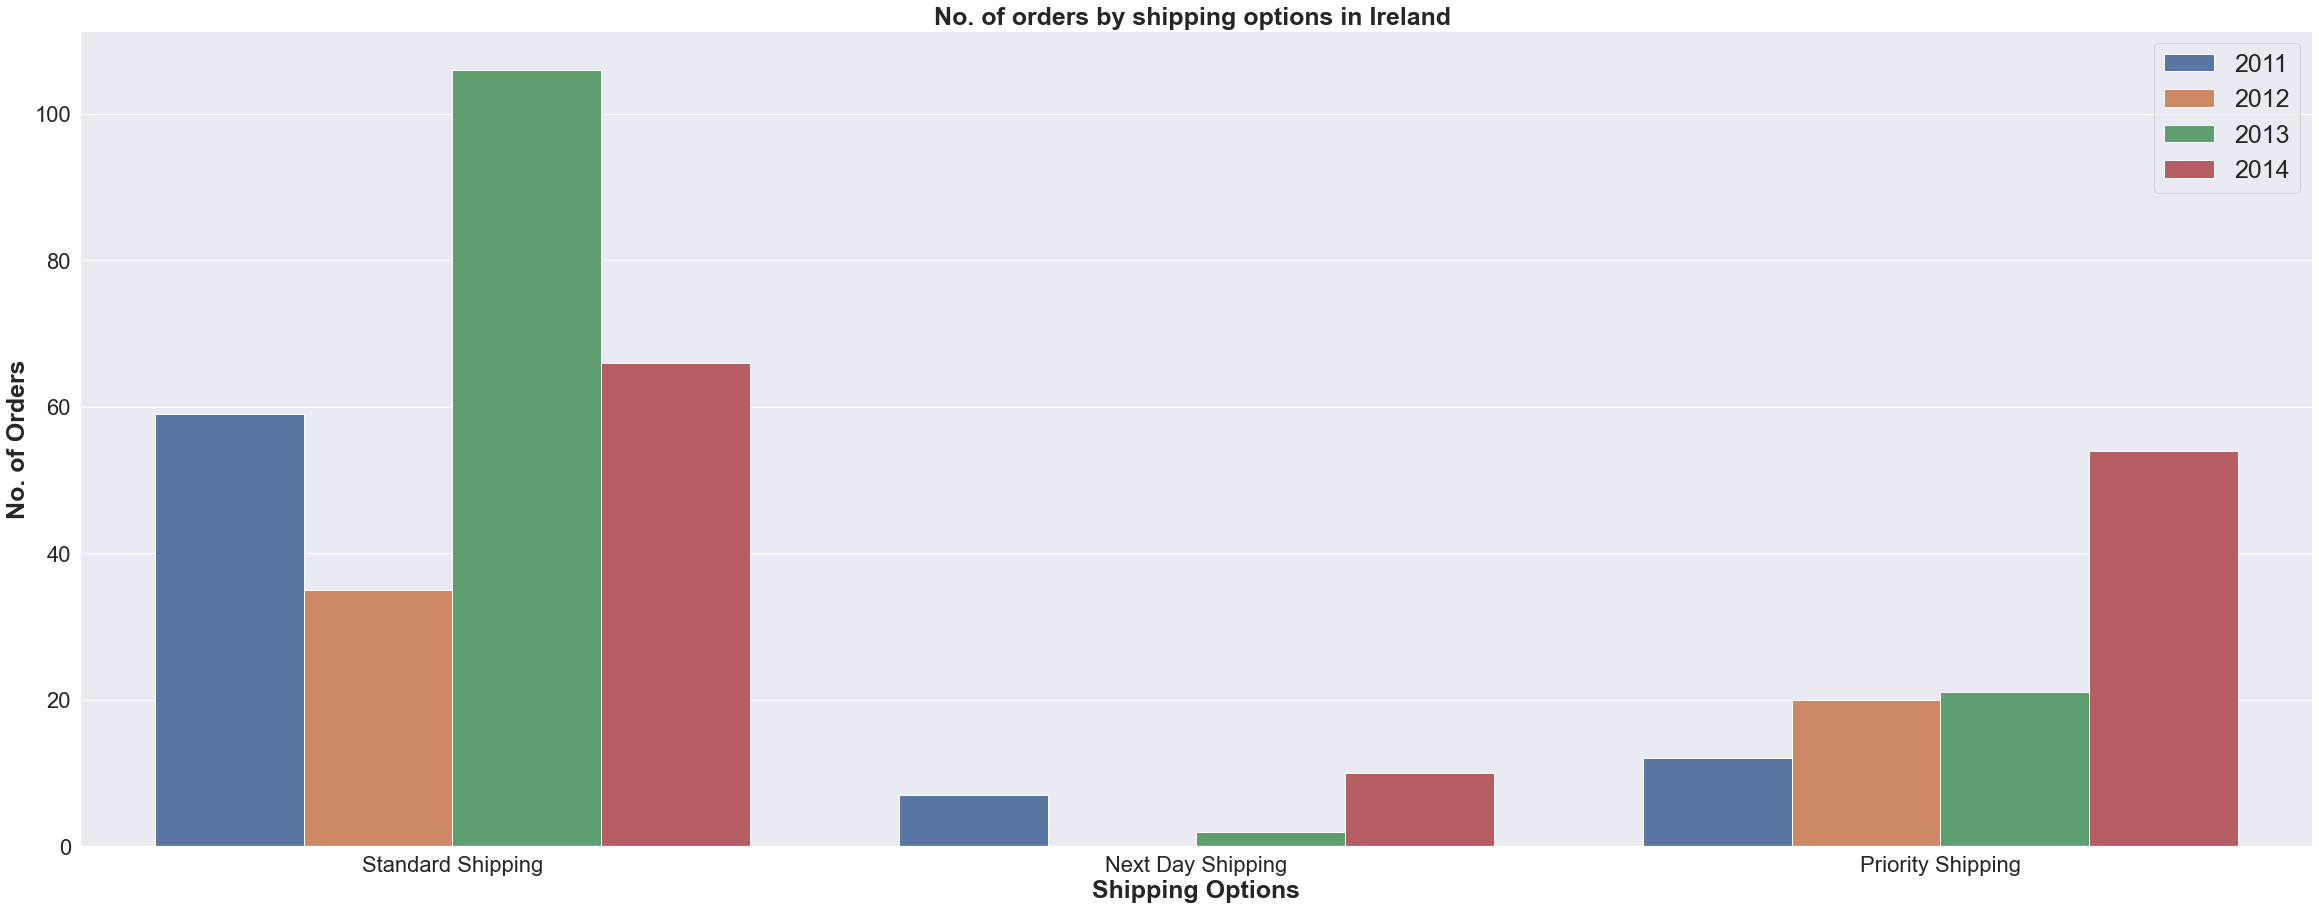

In [31]:
sns.set(font_scale=2)
sns.color_palette("Set2")
p = sns.barplot(
    x="Shipping options", 
    y="Quantity", 
    data=country_df, 
    estimator=sum, 
    ci=None, 
    hue="Year",
    );
p.legend(fontsize=25)
p.set_xlabel("Shipping Options", fontsize = 25, weight='bold')
p.set_ylabel("No. of Orders", fontsize = 25,  weight='bold')
p.set_title("No. of orders by shipping options in Ireland ", fontsize = 25, weight='bold')
plt.rcParams['figure.figsize'] = [40, 15]
plt.show()
fig = p.get_figure()
fig.savefig("Shipping_options_Austria.png") 